In [11]:
import pandas as pd
df = pd.read_csv('PRAPARE Report.csv')
print(df.columns.tolist())


['Client ID', 'Last Name', 'First Name', 'Location Name', 'Are you Hispanic or Latino?', 'Which race are you? ', 'Migrant Work?', 'Armed Forces?', 'Language', 'Family Members', 'Housing', 'HousingWorry', 'Address', 'Education', 'Work', 'Insurance', 'Income', 'Needs', 'Talk', 'Stress', 'Refugee', 'Safe', 'Partner', 'Transport', 'Total Score']


In [13]:
df = df[['Client ID', 'Last Name', 'First Name', 'Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe']]
df

,Client ID,Last Name,First Name,Family Members,HousingWorry,Work,Income,Talk,Stress,Safe
0,2,WATSON,SANDRA,1,No,Unemployed and seeking work,"Less than $24,999",3 to 5 times a week,A little bit,Unsure
1,3317,Patton,Mary,0,No,Part-time or Temporary Work,"$25,000 - $49,999",Less than once a week,Somewhat,No
2,4360,RODRIGUEZ,EMMANUEL,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",Less than once a week,A little bit,No
3,4361,Litvyakov,Sergey,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",3 to 5 times a week,Quite a bit,Yes
4,4363,MABERY,SHANINE,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",1 or 2 times a week,Not at all,Yes
...,...,...,...,...,...,...,...,...,...,...
716,16416,Johnson,Robin,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",5 or more times a week,Quite a bit,Unsure
717,16447,Bisogno,Thomas,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",3 to 5 times a week,A little bit,Yes
718,16480,Grant,Pamela,1,No,Otherwise Unemployed but not seeking work ( EX...,"Less than $24,999",Less than once a week,Very Much\n,No
719,16580,DELFINO,LOUIS,1,No,Otherwise Unemployed but not seeking work ( EX...,I choose not to answer this question.,Less than once a week,Very Much\n,Yes


In [3]:
# convert all data to numbers for later use, standard of issues may change
# set the datas with serious issues to obtain value 1

def housingworry(x):
    result = []
    for element in x:
        if 'Yes' in element:
            result.append(1)
        elif 'No' in element:
            result.append(0)
        else:
            result.append(0.5)
    return result

def work(x):
    result = []
    for element in x:
        if 'Unemployed' in element:
            result.append(1)
        elif 'choose' in element:
            result.append(0.5)
        else:
            result.append(0)
    return result

def talk(x):
    result = []
    for element in x:
        if 'Less' in element or '1' in element:
            result.append(1)
        elif 'choose' in element:
            result.append(0.5)
        else:
            result.append(0)
    return result

def family(x):
    result = []
    for element in x:
        if str(element) == '':
            result.append(1)
        elif 'self' in str(element):
            result.append(1)
        elif 'Self' in str(element):
            result.append(1)
        elif '0' in str(element) or '1' in str(element):
            result.append(1)
        else:
            result.append(0)

    return result



df['HousingWorry_num'] = housingworry(df['HousingWorry'])
df['Work_num'] = work(df['Work'])
df['Income_num'] = df['Income'].apply(lambda x: 1 if 'Less' in x else 0)
df['Talk_num'] = talk(df['Talk'])
df['Stress_num'] = df['Stress'].apply(lambda x: 1 if 'Quite' in x or 'Very' in x else 0)
df['Safe_num'] = df['Safe'].apply(lambda x: 0 if 'Yes' in x else 1)
df['family_num'] = family(df['Family Members'])
df = df.drop(['Family Members', 'HousingWorry', 'Work', 'Income', 'Talk', 'Stress', 'Safe'], axis=1)
df

,Client ID,Last Name,First Name,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num
0,2,WATSON,SANDRA,0.0,1.0,1,0.0,0,1,1
1,3317,Patton,Mary,0.0,0.0,0,1.0,0,1,1
2,4360,RODRIGUEZ,EMMANUEL,0.0,1.0,1,1.0,0,1,1
3,4361,Litvyakov,Sergey,0.0,1.0,1,0.0,1,0,1
4,4363,MABERY,SHANINE,0.0,1.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
716,16416,Johnson,Robin,0.0,1.0,1,0.0,1,1,1
717,16447,Bisogno,Thomas,0.0,1.0,1,0.0,0,0,1
718,16480,Grant,Pamela,0.0,1.0,1,1.0,1,1,1
719,16580,DELFINO,LOUIS,0.0,1.0,0,1.0,1,0,1


In [4]:
# divide people into groups where each maintain the ones having most serious problem
df_serious_housing = df[df['HousingWorry_num']==1]
print('serious housing count', len(df_serious_housing))
df_serious_work = df[df['Work_num']==1]
print('serious work count', len(df_serious_work))
df_serious_income = df[df['Income_num']==1]
print('serious income count', len(df_serious_income))
df_serious_talk = df[df['Talk_num']==1]
print('serious talk count', len(df_serious_talk))
df_serious_stress = df[df['Stress_num']==1]
print('serious stress count', len(df_serious_stress))
df_serious_safe = df[df['Safe_num']==1]
print('serious safe count', len(df_serious_safe))
df_serious_family = df[df['family_num']==1]
print('serious family count', len(df_serious_family))


serious housing count 76
serious work count 621
serious income count 441
serious talk count 327
serious stress count 136
serious safe count 219
serious family count 656


In [5]:
df_serious_housing

,Client ID,Last Name,First Name,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num
8,4372,LEMOINE,KELLY,1.0,1.0,1,0.0,1,0,1
11,4380,AYALA,MIGUEL,1.0,1.0,0,1.0,1,0,1
12,4381,COSTELLO,ELLEN,1.0,1.0,0,1.0,1,0,1
22,4404,Spencer,Sherri,1.0,1.0,1,1.0,0,1,1
25,4407,GORDON,AUDREY,1.0,1.0,1,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
695,15936,Browne,Monique,1.0,1.0,0,0.0,0,0,0
699,15990,Presley,Kerry,1.0,1.0,1,1.0,0,0,0
707,16187,Parilla,Pedro,1.0,1.0,0,0.0,0,1,1
712,16292,Reed,Alfred,1.0,1.0,0,1.0,0,0,1


In [6]:
# for each group of people, analyze their program and location by merging the groups with Demographics_18-10-2022_22332
demo = pd.read_excel('Demographics.xlsx')
demo2 = pd.read_excel('served list all 09302022 (1).xlsx')
# print(demo.columns.tolist())
demo = demo[['CLIENTID', 'CLIENTNAME', 'LOCATIONNAME', 'LOCATIONSTARTDATE', 'LOCATIONENDDATE', 'ZIPCODE']]
demo2 = demo2[['CLIENTID', 'CLIENTNAME', 'LOCATIONNAME', 'LOCATIONFIXED','LOCATIONSTARTDATE', 'TYPEFIXED','LOCATIONENDDATE']]
# demo = demo[pd.notnull(demo['LOCATIONNAME'])]
merge_housing = df_serious_housing.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
merge_work = df_serious_work.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
merge_income = df_serious_income.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
merge_talk = df_serious_talk.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
merge_stress = df_serious_stress.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
merge_safe = df_serious_safe.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
merge_family = df_serious_family.merge(demo, how='left',left_on='Client ID', right_on='CLIENTID')
# merge_housing


In [7]:
demo2

,CLIENTID,CLIENTNAME,LOCATIONNAME,LOCATIONFIXED,LOCATIONSTARTDATE,TYPEFIXED,LOCATIONENDDATE
0,10.0,"TYSON,CARY",ACT TEAM - Bronx,ACT TEAM - Bronx,2020-04-20,ACT,NaN
1,10000.0,"HAMILTON,CARLOUS",Highland Park Center - Clinic,Highland Park Center,2021-05-28,Clinic,NaN
2,10000.0,"HAMILTON,CARLOUS",ICL Connect,ICL Connect,2021-03-03,CC/CM,NaN
3,10001.0,"HUNTE,JANIEL",ACT TEAM - Bushwick,ACT TEAM - Bushwick,2017-02-23,ACT,NaN
4,10004.0,"WILSON,MICAH",ACT TEAM - Central Brooklyn,ACT TEAM - Central Brooklyn,2015-04-13,ACT,NaN
...,...,...,...,...,...,...,...
10977,NaN,"MURRAY,SAMUEL",PROS,PROS,2021-12-06,PROS,NaN
10978,NaN,"MUNIZ,AEISHA",PROS,PROS,2022-01-14,PROS,NaN
10979,NaN,"MARIN,KEVINJ",PROS,PROS,2022-02-14,PROS,NaN
10980,NaN,"CORTES,CINDY",PROS,PROS,2022-04-07,PROS,NaN


In [8]:
merge_housing = df_serious_housing.merge(demo2, how='left',left_on='Client ID', right_on='CLIENTID')

In [9]:
# Sort the data based on the date completed and client id
merge_housing = merge_housing.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_housing['Client ID'].duplicated(keep = 'last')
merge_housing.drop(dup3[dup3].index, axis=0, inplace=True)
merge_housing = merge_housing.dropna(thresh = 5)

In [10]:
merge_housing

,Client ID,Last Name,First Name,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num,CLIENTID,CLIENTNAME,LOCATIONNAME,LOCATIONFIXED,LOCATIONSTARTDATE,TYPEFIXED,LOCATIONENDDATE
60,9817,PAGAN,VANESSA,1.0,1.0,1,0.0,0,1,1,9817.0,"PAGAN,VANESSA",ACT TEAM - Chapel Street,ACT TEAM - Chapel Street,2018-07-31,ACT,NaN
14,4551,PENA,MARIA,1.0,1.0,1,0.0,0,0,1,4551.0,"PENA,MARIA",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-10-21,SH,NaN
15,4553,ROSENBLATT,BONNIE,1.0,1.0,0,1.0,0,0,1,4553.0,"ROSENBLATT,BONNIE",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-10-22,SH,NaN
13,4538,TALBERT,ANDRE,1.0,1.0,1,0.0,0,0,1,4538.0,"TALBERT,ANDRE",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-12-08,SH,NaN
16,4558,ALBANO,RAYMOND,1.0,1.0,1,1.0,0,0,1,4558.0,"ALBANO,RAYMOND",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-12-21,SH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,15149,Yormark,Gary,1.0,1.0,1,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,15183,Rizzo,Allison,1.0,1.0,1,1.0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,15270,ROBERTSON,SHELLY,1.0,1.0,0,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,15515,MILES,WILLIAM,1.0,1.0,0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#merge the chart with CORE_OMH_Tables0829DATA.xlsx to obtain the Program Type
core = pd.read_excel('CORE_OMH_Tables0829DATA.xlsx')
core = core[['Program', 'Type']]
merge_housing = merge_housing.merge(core, how='left', left_on='LOCATIONNAME', right_on='Program')
merge_work = merge_work.merge(core, how='left',left_on='LOCATIONNAME', right_on='Program')
merge_income = merge_income.merge(core, how='left',left_on='LOCATIONNAME', right_on='Program')
merge_talk = merge_talk.merge(core, how='left',left_on='LOCATIONNAME', right_on='Program')
merge_stress = merge_stress.merge(core, how='left',left_on='LOCATIONNAME', right_on='Program')
merge_safe = merge_safe.merge(core, how='left',left_on='LOCATIONNAME', right_on='Program')
merge_family = merge_family.merge(core, how='left',left_on='LOCATIONNAME', right_on='Program')
# merge_work

In [90]:
merge_housing = merge_housing.sort_values(by=['LOCATIONNAME','LOCATIONSTARTDATE'])

dup3 = merge_housing['Client ID'].duplicated(keep = 'last')
merge_housing.drop(dup3[dup3].index, axis=0, inplace=True)
merge_housing = merge_housing.dropna(thresh = 5)

In [109]:
merge_housing

,Client ID,Last Name,First Name,HousingWorry_num,Work_num,Income_num,Talk_num,Stress_num,Safe_num,family_num,CLIENTID,CLIENTNAME,LOCATIONNAME,LOCATIONFIXED,LOCATIONSTARTDATE,TYPEFIXED,LOCATIONENDDATE
60,9817,PAGAN,VANESSA,1.0,1.0,1,0.0,0,1,1,9817.0,"PAGAN,VANESSA",ACT TEAM - Chapel Street,ACT TEAM - Chapel Street,2018-07-31,ACT,NaN
14,4551,PENA,MARIA,1.0,1.0,1,0.0,0,0,1,4551.0,"PENA,MARIA",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-10-21,SH,NaN
15,4553,ROSENBLATT,BONNIE,1.0,1.0,0,1.0,0,0,1,4553.0,"ROSENBLATT,BONNIE",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-10-22,SH,NaN
13,4538,TALBERT,ANDRE,1.0,1.0,1,0.0,0,0,1,4538.0,"TALBERT,ANDRE",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-12-08,SH,NaN
16,4558,ALBANO,RAYMOND,1.0,1.0,1,1.0,0,0,1,4558.0,"ALBANO,RAYMOND",ADULT HOME HOME SHP (62 BED),ADULT HOME HOME SHP,2015-12-21,SH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,15149,Yormark,Gary,1.0,1.0,1,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,15183,Rizzo,Allison,1.0,1.0,1,1.0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,15270,ROBERTSON,SHELLY,1.0,1.0,0,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,15515,MILES,WILLIAM,1.0,1.0,0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


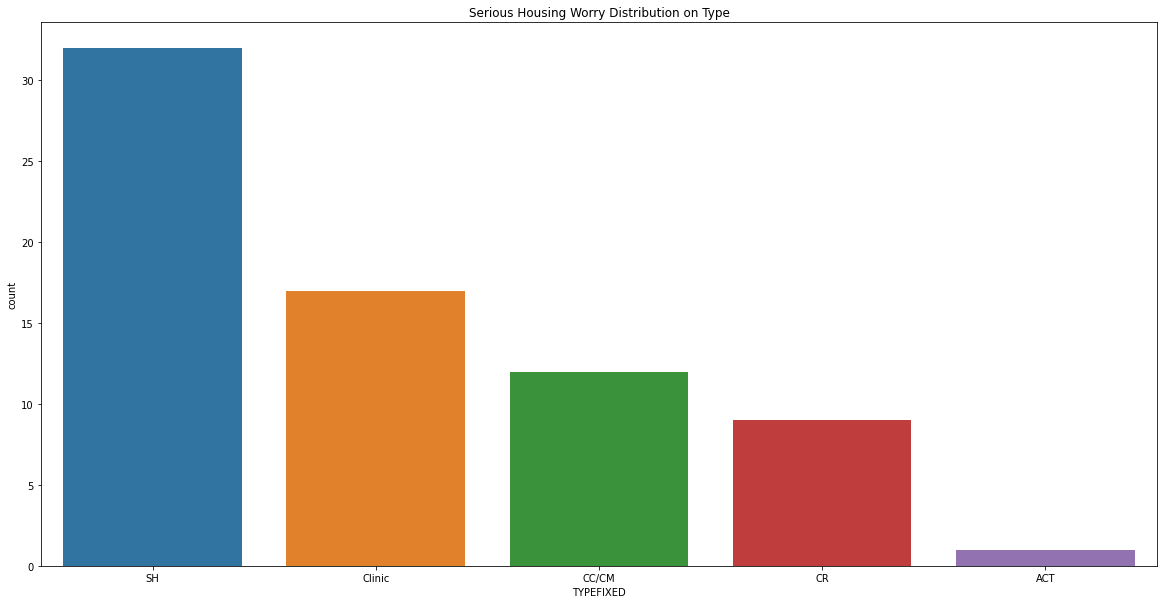

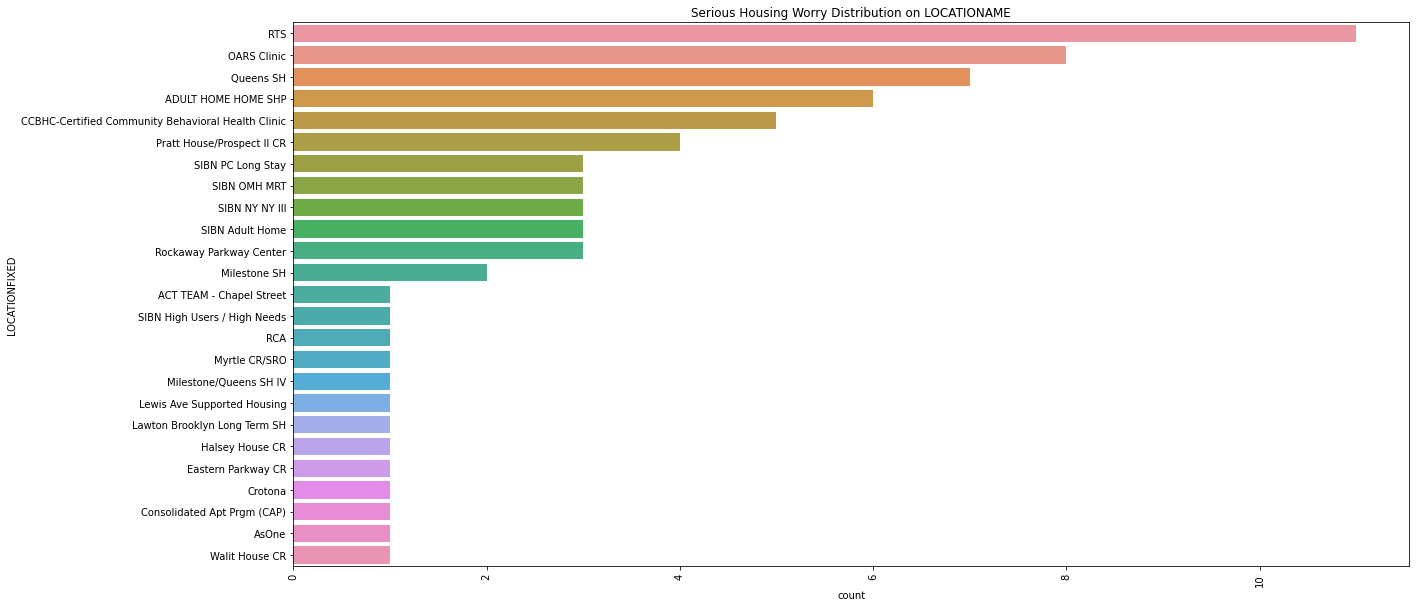

In [110]:
# For housing, show the portion of location and Type
tmp1_LOCATIONAME = merge_housing.groupby(['LOCATIONFIXED'])['LOCATIONFIXED'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_housing.groupby(['TYPEFIXED'])['TYPEFIXED'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
tmp1_Type['TYPEFIXED'] = tmp1_Type['TYPEFIXED'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="TYPEFIXED", y="count")
plt.title('Serious Housing Worry Distribution on Type')
plt.show()

rcParams['figure.figsize'] = 20,10
ax = sns.barplot( y="LOCATIONFIXED", x="count",data=tmp1_LOCATIONAME,)
plt.xticks(rotation=90)
plt.title('Serious Housing Worry Distribution on LOCATIONAME')
plt.show()


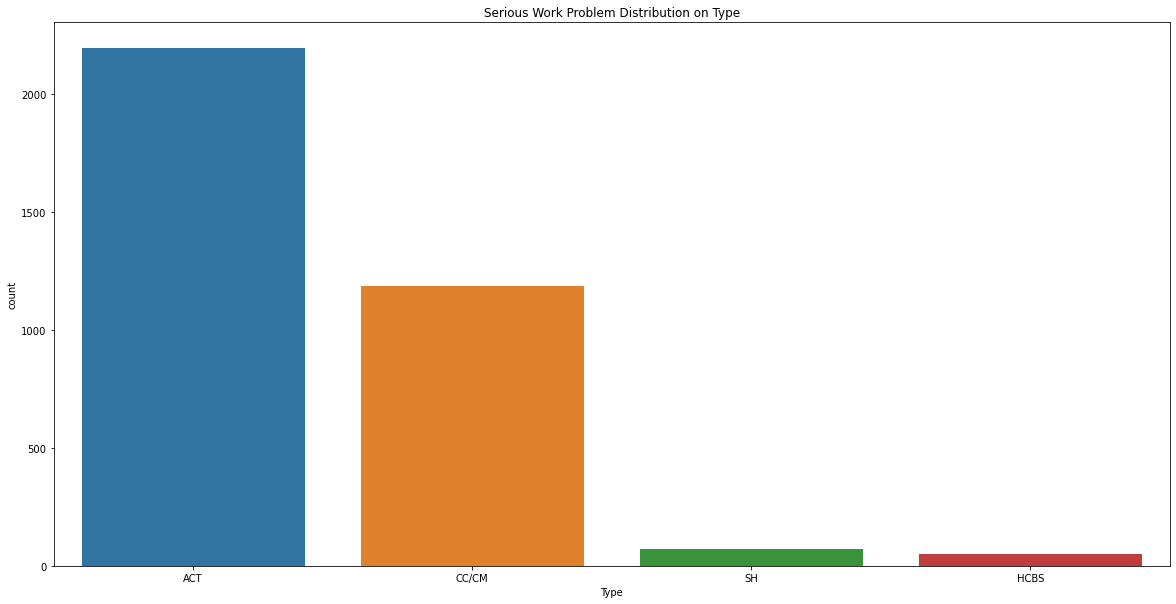

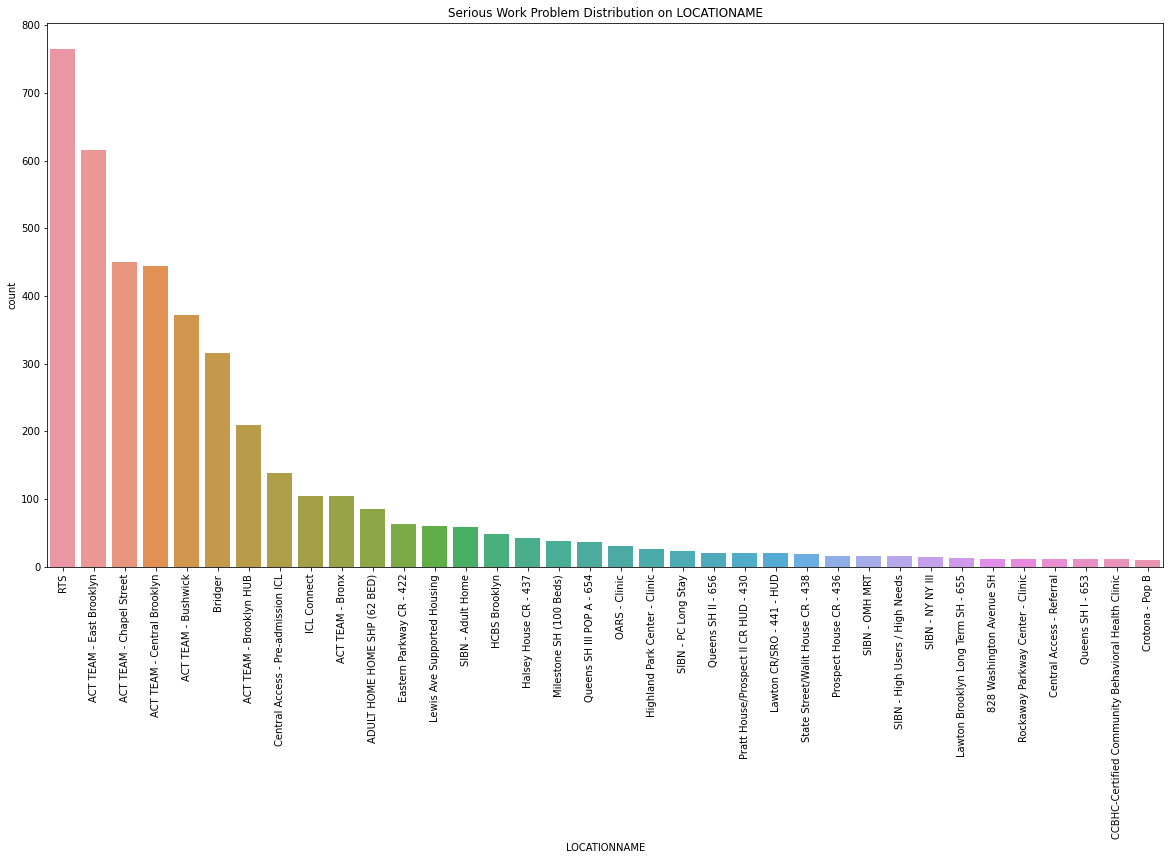

In [85]:
# For work
tmp1_LOCATIONAME = merge_work.groupby(['LOCATIONNAME'])['LOCATIONNAME'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_work.groupby(['Type'])['Type'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and type distribution using pie chart
tmp1_Type = tmp1_Type[tmp1_Type['count']>=10]
tmp1_LOCATIONAME = tmp1_LOCATIONAME[tmp1_LOCATIONAME['count']>=10]

tmp1_Type['Type'] = tmp1_Type['Type'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="Type", y="count")
plt.title('Serious Work Problem Distribution on Type')
plt.show()

ax = sns.barplot(data=tmp1_LOCATIONAME, x="LOCATIONNAME", y="count")
plt.xticks(rotation=90)
plt.title('Serious Work Problem Distribution on LOCATIONAME')
plt.show()

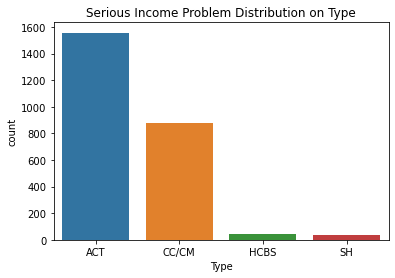

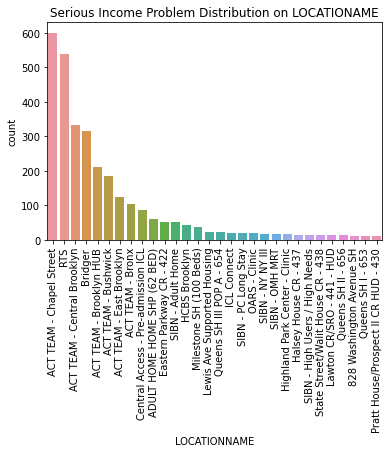

In [13]:
# For income
tmp1_LOCATIONAME = merge_income.groupby(['LOCATIONNAME'])['LOCATIONNAME'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_income.groupby(['Type'])['Type'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and type distribution using pie chart
tmp1_Type = tmp1_Type[tmp1_Type['count']>=10]
tmp1_LOCATIONAME = tmp1_LOCATIONAME[tmp1_LOCATIONAME['count']>=10]

tmp1_Type['Type'] = tmp1_Type['Type'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="Type", y="count")
plt.title('Serious Income Problem Distribution on Type')
plt.show()

ax = sns.barplot(data=tmp1_LOCATIONAME, x="LOCATIONNAME", y="count")
plt.xticks(rotation=90)
plt.title('Serious Income Problem Distribution on LOCATIONAME')
plt.show()

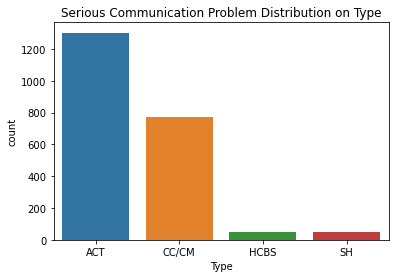

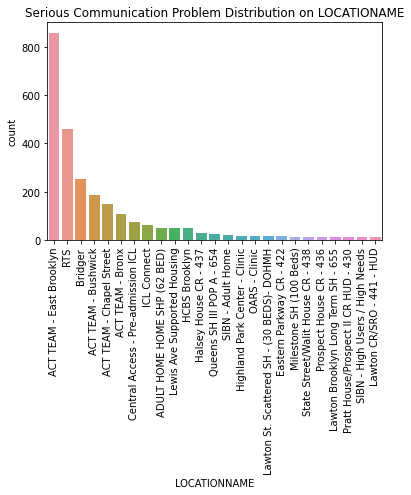

In [14]:
# For Talk
tmp1_LOCATIONAME = merge_talk.groupby(['LOCATIONNAME'])['LOCATIONNAME'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_talk.groupby(['Type'])['Type'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and type distribution using pie chart
tmp1_Type = tmp1_Type[tmp1_Type['count']>=10]
tmp1_LOCATIONAME = tmp1_LOCATIONAME[tmp1_LOCATIONAME['count']>=10]

tmp1_Type['Type'] = tmp1_Type['Type'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="Type", y="count")
plt.title('Serious Communication Problem Distribution on Type')
plt.show()

ax = sns.barplot(data=tmp1_LOCATIONAME, x="LOCATIONNAME", y="count")
plt.xticks(rotation=90)
plt.title('Serious Communication Problem Distribution on LOCATIONAME')
plt.show()

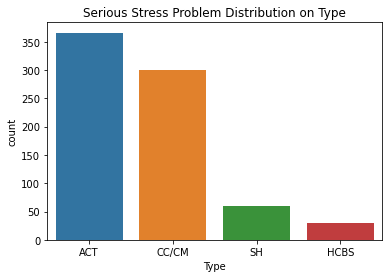

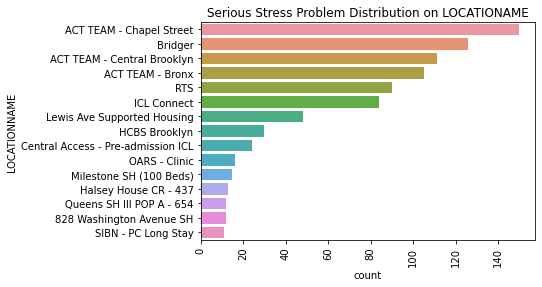

In [18]:
# For Stress
tmp1_LOCATIONAME = merge_stress.groupby(['LOCATIONNAME'])['LOCATIONNAME'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_stress.groupby(['Type'])['Type'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
tmp1_Type = tmp1_Type[tmp1_Type['count']>=10]
tmp1_LOCATIONAME = tmp1_LOCATIONAME[tmp1_LOCATIONAME['count']>=10]

tmp1_Type['Type'] = tmp1_Type['Type'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="Type", y="count")
plt.title('Serious Stress Problem Distribution on Type')
plt.show()

ax = sns.barplot(data=tmp1_LOCATIONAME, y="LOCATIONNAME", x="count")
plt.xticks(rotation=90)
plt.title('Serious Stress Problem Distribution on LOCATIONAME')
plt.show()

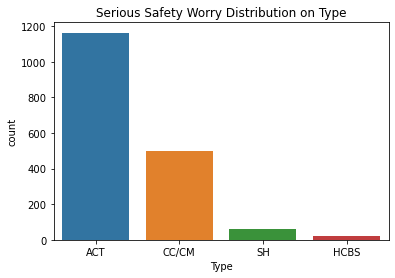

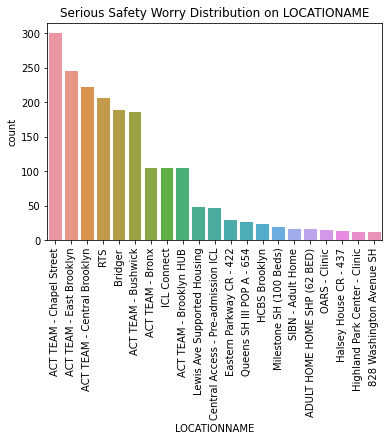

In [16]:
# For Safety
tmp1_LOCATIONAME = merge_safe.groupby(['LOCATIONNAME'])['LOCATIONNAME'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_safe.groupby(['Type'])['Type'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
tmp1_Type = tmp1_Type[tmp1_Type['count']>=10]
tmp1_LOCATIONAME = tmp1_LOCATIONAME[tmp1_LOCATIONAME['count']>=10]

tmp1_Type['Type'] = tmp1_Type['Type'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="Type", y="count")
plt.title('Serious Safety Worry Distribution on Type')
plt.show()

ax = sns.barplot(data=tmp1_LOCATIONAME, x="LOCATIONNAME", y="count")
plt.xticks(rotation=90)
plt.title('Serious Safety Worry Distribution on LOCATIONAME')
plt.show()

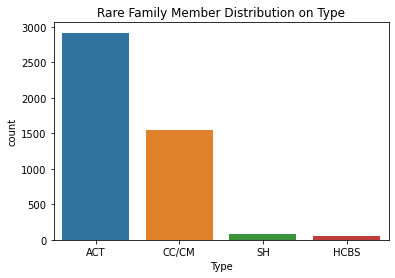

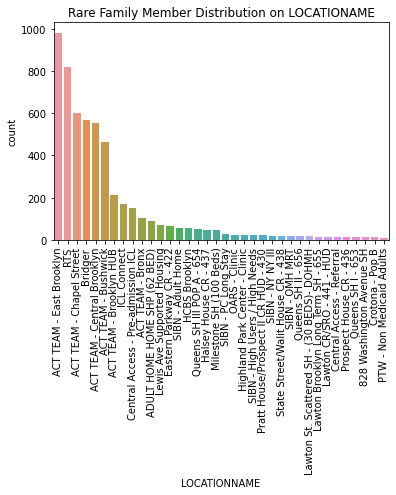

In [17]:
# For Family
tmp1_LOCATIONAME = merge_family.groupby(['LOCATIONNAME'])['LOCATIONNAME'].count().sort_values(ascending=False).reset_index(name='count')
tmp1_Type = merge_family.groupby(['Type'])['Type'].count().sort_values(ascending=False).reset_index(name='count')
# Plot the locationame and Type distribution using pie chart
tmp1_Type = tmp1_Type[tmp1_Type['count']>=10]
tmp1_LOCATIONAME = tmp1_LOCATIONAME[tmp1_LOCATIONAME['count']>=10]

tmp1_Type['Type'] = tmp1_Type['Type'].astype(str).replace('\.\d+', '', regex=True)
ax = sns.barplot(data=tmp1_Type, x="Type", y="count")
plt.title('Rare Family Member Distribution on Type')
plt.show()

ax = sns.barplot(data=tmp1_LOCATIONAME, x="LOCATIONNAME", y="count")
plt.xticks(rotation=90)
plt.title('Rare Family Member Distribution on LOCATIONAME')
plt.show()